In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the uploaded files
file_baseline = 'all_model_baseline.csv'
file_v2 = 'all_model_v2.csv'
file_time = 'all_model_time.csv'

# Read the CSV files into dataframes
df_baseline = pd.read_csv(file_baseline)
df_v2 = pd.read_csv(file_v2)
df_time = pd.read_csv(file_time)

# Display the loaded dataframes for a better understanding of their structure
df_baseline.head(), df_v2.head(), df_time.head()


(       Model  Batch  Memory_Usage  Memory_Opt_Usage  Memory_Reduction  \
 0    alexnet      1        0.4579            0.3717         18.821159   
 1    alexnet     32        0.5618            0.4783         14.860221   
 2  googlenet      1        0.1259            0.1050         16.585060   
 3  googlenet     32        1.5023            1.5000          0.149350   
 4    mnasnet      1        0.0374            0.0366          2.181868   
 
    Proc_time  
 0   0.033192  
 1   0.030476  
 2   1.063719  
 3   0.861564  
 4   0.646865  ,
        Model  Batch  Memory_Usage  Memory_Opt_Usage  Memory_Reduction  \
 0    alexnet      1        0.4579            0.3717         18.824491   
 1    alexnet     32        0.5618            0.4783         14.862938   
 2  googlenet      1        0.1259            0.1090         16.685060   
 3  googlenet     32        1.5023            1.4954          0.458489   
 4    mnasnet      1        0.0374            0.0366          2.159167   
 
      Proc_

19.071331250000004
17.78463125
19.328218333333336
Approach
Model                 squeezenet
Combined_version        1.800164
Data_Gen_Cost_only       0.41077
MODel_opt                0.41077
Difference              1.389394
Name: 7, dtype: object
0         alexnet
1       googlenet
2         mnasnet
3       mobilenet
4          resnet
5        resnet3d
6        resnet50
7      squeezenet
8     transformer
9             vgg
10          vgg16
11          vgg19
Name: Model, dtype: object
MODel_opt
Combined_version
Data_Gen_Cost_only


/tmp/ipykernel_169228/3389849023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_filtered['Approach'] = 'MODel_opt'
/tmp/ipykernel_169228/3389849023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_filtered['Approach'] = 'Combined_version'
/tmp/ipykernel_169228/3389849023.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

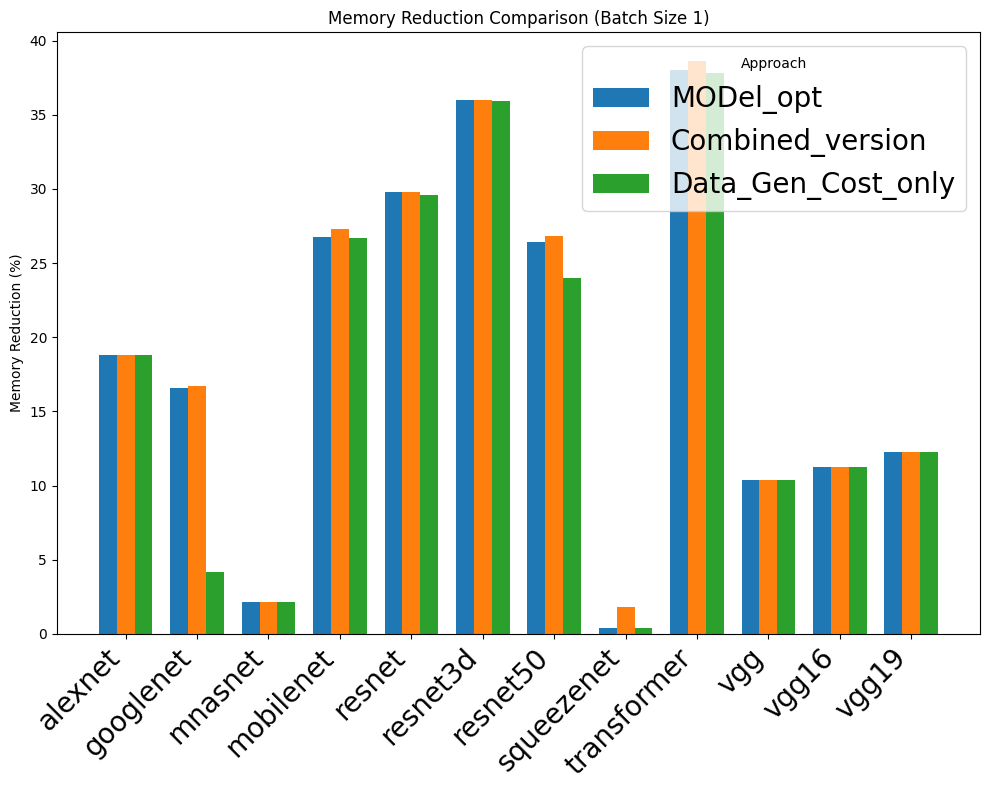

In [3]:
# Filter data for batch size 1
BATCH_SIZE = 1
baseline_filtered = df_baseline[df_baseline['Batch'] == BATCH_SIZE]
v2_filtered = df_v2[df_v2['Batch'] == BATCH_SIZE]
time_filtered = df_time[df_time['Batch'] == BATCH_SIZE]
# Combine data into a single dataframe with an approach column
baseline_filtered['Approach'] = 'MODel_opt'
v2_filtered['Approach'] = 'Combined_version'
time_filtered['Approach'] = 'Data_Gen_Cost_only'
total_base = baseline_filtered["Memory_Reduction"].mean()
total_time = time_filtered["Memory_Reduction"].mean()
total_v2 = v2_filtered["Memory_Reduction"].mean()
print(total_base)
print(total_time)
print(total_v2)
combined_data = pd.concat([baseline_filtered, v2_filtered, time_filtered])

# # Plotting the grouped bar chart
# fig, ax = plt.subplots(figsize=(12, 6))
# for idx, (key, group) in enumerate(combined_data.groupby('Approach')):
#     ax.bar(
#         group['Model'] + f"_{key}",  # Models are grouped per approach
#         group['Memory_Reduction'],
#         label=key
#     )
# Refine data to calculate percentage memory reduction
combined_data['Memory_Reduction (%)'] = combined_data['Memory_Reduction']
models = combined_data['Model'].unique()
approaches = combined_data['Approach'].unique()
# Align models across all approaches by creating a pivot table
pivot_data = combined_data.pivot_table(
    index='Model', columns='Approach', values='Memory_Reduction (%)', fill_value=0
).reset_index()
# Calculate the difference between Baseline and MnasNet for each model
pivot_data['Difference'] = pivot_data.get('Combined_version', 0) - pivot_data.get('MODel_opt', 0)

# Find the model with the maximum difference
max_difference_row = pivot_data.loc[pivot_data['Difference'].idxmax()]
#max_difference_row = pivot_data.loc[pivot_data['Difference']]

print(max_difference_row)

# Prepare data for plotting
models = pivot_data['Model']
print(models)
x = range(len(models))
width = 0.25  # Width of each bar

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 8))

for i, approach in enumerate(approaches):
    print(approach)
    ax.bar(
        [pos + i * width for pos in x], 
        pivot_data[approach], 
        width, 
        label=approach
    )

# Add labels, title, and legend
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=20)
ax.set_ylabel('Memory Reduction (%)')
ax.set_title('Memory Reduction Comparison (Batch Size 1)')
ax.legend(title='Approach', fontsize=20)

plt.tight_layout()
plt.show()

